In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
import tensorflow.keras.backend as K
import os
import glob
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import imutils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
def euclidean_distance(vectors):
	# unpack the vectors into separate lists
	(featsA, featsB) = vectors

	# compute the sum of squared distances between the vectors
	sumSquared = K.sum(K.square(featsA - featsB), axis=1,
		keepdims=True)

	# return the euclidean distance between the vectors
	return K.sqrt(K.maximum(sumSquared, K.epsilon()))



def build_siamese_model(inputShape, embeddingDim=48):
	# specify the inputs for the feature extractor network
	inputs = Input(inputShape)

	# define the first set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(inputs)
	x = MaxPooling2D(pool_size=(2, 2))(x)
	x = Dropout(0.3)(x)

	# second set of CONV => RELU => POOL => DROPOUT layers
	x = Conv2D(64, (2, 2), padding="same", activation="relu")(x)
	x = MaxPooling2D(pool_size=2)(x)
	x = Dropout(0.3)(x)

	# prepare the final outputs
	pooledOutput = GlobalAveragePooling2D()(x)
	outputs = Dense(embeddingDim)(pooledOutput)

	# build the model
	model = Model(inputs, outputs)

	# return the model to the calling function
	return model

In [2]:
#Analisar shape minimo para a imagem

In [32]:
def zero_padding(image, width, height):
    new_size = image.shape[:2]
    delta_w = width - new_size[1]
    delta_h = height - new_size[0]
    if delta_w < 0:
        delta_w = delta_w*-1
    if delta_h <0:
        delta_h = delta_h*-1
    if delta_h ==0 and delta_w ==0:
        return image
    else:
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
        color = (0, 0, 0)
        new_im = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
        return new_im

In [38]:
def load_data(files, width, height, debug=False, augmented=False):
    X = []
    for file in files:
        im = cv2.imread(file,0)
        im = imutils.resize(im, width, height)
        im = zero_padding(im, width, height)
        if debug is True:
            cv2_imshow(im)
            debug = False
        im - im.astype(np.float32)
        im = im / 255
        if im.shape != (224,224):
            print(file)
            print(im.shape)
        X.append(im)
    X = np.array(X)
    print(X.shape)
    train_x = X.reshape(X.shape[0], width, height, 1)
    return train_x


In [5]:
!cp -r /content/drive/MyDrive/TrainingSet/ /content/

In [4]:
width, height = (224, 224)

In [42]:
R_img = glob.glob("/content/TrainingSet/Reference/*.png")
S_img = glob.glob("/content/TrainingSet/Simulated/*.png")
print(len(R_img))
print(len(S_img))

8
100


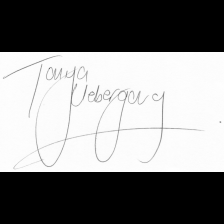

(8, 224, 224)


In [39]:
R_train = load_data(R_img, width, height, True)

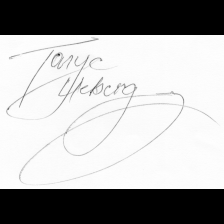

(100, 224, 224)


In [43]:
S_train = load_data(S_img, width, height, True)